In [61]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [ ]:
data = pd.read_csv('data.csv')
L = [i.strip() for i in list(data.keys())]
data.columns = L

In [78]:
S = [i.strip() for i in list(data['name'])]
data['name'] = S

In [79]:
data.to_csv('data.csv')

In [ ]:
# Convert numeric columns, keeping original column names
numeric_columns = ['price_ingame', 'cargo_capacity', 'mass', 'price', 'scm', 'max', 'length', 'beam', 'height']

for col in numeric_columns:
    # Find the matching column name with potential trailing spaces
    matching_col = [c for c in data.columns if c.strip() == col][0]
    # Convert to numeric and assign back to clean column name
    data[col] = pd.to_numeric(data[matching_col], errors='coerce')

In [64]:
# Obtenir la liste unique des types de vaisseaux
types_vaisseaux = data['type'].unique()

# Créer un dictionnaire pour stocker les différents DataFrames
df_by_type = {}

# Créer un DataFrame pour chaque type de vaisseau
for type_vaisseau in types_vaisseaux:
    df_by_type[type_vaisseau] = data[data['type'] == type_vaisseau].copy()

# Afficher les informations sur chaque DataFrame créé
for type_vaisseau, df in df_by_type.items():
    print(f"\nType de vaisseau: {type_vaisseau}")
    print(f"Nombre de vaisseaux: {len(df)}")
    print("-" * 50)


Type de vaisseau:  multi      
Nombre de vaisseaux: 13
--------------------------------------------------

Type de vaisseau:  exploration
Nombre de vaisseaux: 22
--------------------------------------------------

Type de vaisseau:  combat     
Nombre de vaisseaux: 70
--------------------------------------------------

Type de vaisseau:  competition
Nombre de vaisseaux: 14
--------------------------------------------------

Type de vaisseau:  support    
Nombre de vaisseaux: 10
--------------------------------------------------

Type de vaisseau:  industrial 
Nombre de vaisseaux: 14
--------------------------------------------------

Type de vaisseau:  ground     
Nombre de vaisseaux: 28
--------------------------------------------------

Type de vaisseau:  transport  
Nombre de vaisseaux: 30
--------------------------------------------------


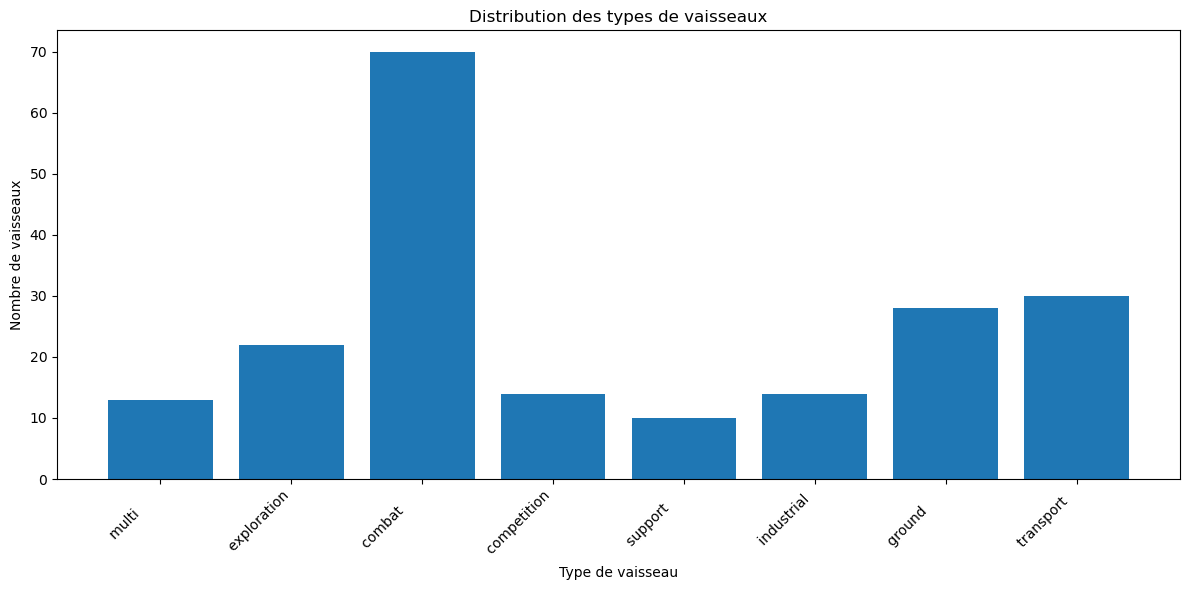

In [65]:
import matplotlib.pyplot as plt

# Préparer les données pour l'histogramme
types = list(df_by_type.keys())
counts = [len(df) for df in df_by_type.values()]

# Créer la figure avec une taille personnalisée
plt.figure(figsize=(12, 6))

# Créer l'histogramme
plt.bar(types, counts)

# Personnaliser le graphique
plt.title('Distribution des types de vaisseaux')
plt.xlabel('Type de vaisseau')
plt.ylabel('Nombre de vaisseaux')

# Rotation des labels sur l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Ajuster automatiquement les marges
plt.tight_layout()

# Afficher le graphique
plt.show()

In [66]:
# Filter data for combat type ships
combat = data[data['type'].str.strip() == 'combat']

print(f"Number of combat ships: {len(combat)}")
combat

Number of combat ships: 70


,Unnamed: 0,Unnamed: 1,name,cargo_capacity,mass,crew,manufacturer,type,status,role,price,release_date,price_ingame,scm,max,length,beam,height
5,5,325a,325a,4,79324.0,1,Origin Jumpworks,combat,flight-ready,""" """"{'0': 'Light Fighter' '1': 'Interdiction'...",70.0,2014,1852200.0,260.0,1425.0,27.5,17.0,8.0
12,12,A1 Spirit,A1 Spirit,0,314271.0,2,Crusader Industries,combat,flight-ready,{'0': 'Bomber'} ...,200.0,2023,4961250.0,204.0,1130.0,47.5,44.0,10.0
13,13,A2 Hercules,A2 Hercules,216,3139240.0,8,Crusader Industries,combat,flight-ready,{'0': 'Heavy Bomber'} ...,750.0,2021,44296876.0,160.0,950.0,70.0,94.0,23.0
16,16,Ares Star Fighter Inferno,Ares Star Fighter Inferno,0,329001.0,1,Crusader Industries,combat,flight-ready,{'0': 'Heavy Fighter'} ...,250.0,2021,4725000.0,210.0,110.0,27.0,30.0,6.0
17,17,Ares Star Fighter Ion,Ares Star Fighter Ion,0,329001.0,1,Crusader Industries,combat,flight-ready,{'0': 'Heavy Fighter'} ...,250.0,2021,4725000.0,210.0,1100.0,27.0,30.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,189,Vanguard Harbinger,Vanguard Harbinger,0,236604.0,2,Aegis Dynamics,combat,flight-ready,{'0': 'Bomber'} ...,290.0,2019,11510100.0,219.0,1115.0,48.0,40.0,9.5
190,190,Vanguard Hoplite,Vanguard Hoplite,0,234870.0,2,Aegis Dynamics,combat,flight-ready,{'0': 'Dropship'} ...,240.0,2016,9327150.0,209.0,1115.0,48.0,40.0,9.5
191,191,Vanguard Sentinel,Vanguard Sentinel,0,232170.0,2,Aegis Dynamics,combat,flight-ready,{'0': 'Interdiction'} ...,275.0,2019,10914750.0,217.0,1111.0,48.0,40.0,9.5
192,192,Vanguard Warden,Vanguard Warden,0,244270.0,2,Aegis Dynamics,combat,flight-ready,{'0': 'Heavy Fighter'} ...,260.0,2016,10319400.0,215.0,1111.0,48.0,40.0,9.5



Constructeur:  Origin Jumpworks                         
Nombre de vaisseaux: 19
--------------------------------------------------

Constructeur:  Crusader Industries                      
Nombre de vaisseaux: 11
--------------------------------------------------

Constructeur:  Roberts Space Industries                 
Nombre de vaisseaux: 26
--------------------------------------------------

Constructeur:  Anvil Aerospace                          
Nombre de vaisseaux: 28
--------------------------------------------------

Constructeur:  Argo Astronautics                        
Nombre de vaisseaux: 8
--------------------------------------------------

Constructeur:  Aegis Dynamics                           
Nombre de vaisseaux: 22
--------------------------------------------------

Constructeur:  Esperia                                  
Nombre de vaisseaux: 5
--------------------------------------------------

Constructeur:  Drake Interplanetary                     
Nombre de vai

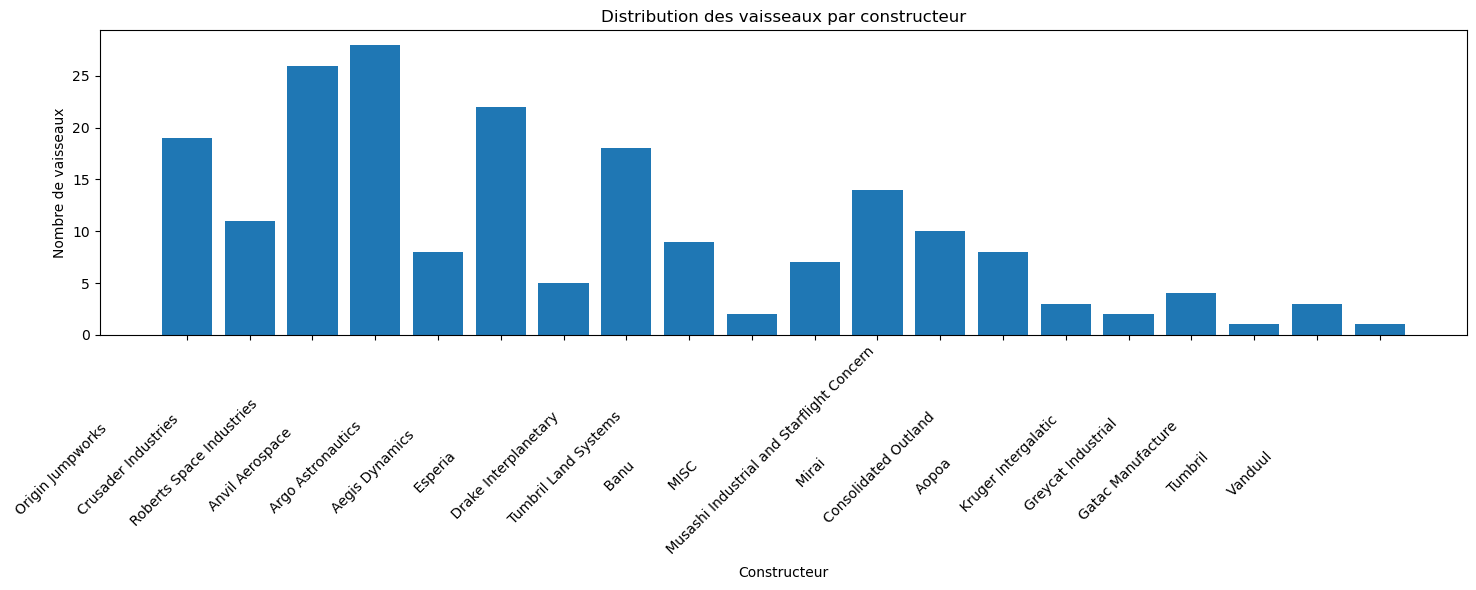

In [67]:
# Obtenir la liste unique des constructeurs
constructeurs = data['manufacturer'].unique()

# Créer un dictionnaire pour stocker les différents DataFrames
df_by_manufacturer = {}

# Créer un DataFrame pour chaque constructeur
for constructeur in constructeurs:
    df_by_manufacturer[constructeur] = data[data['manufacturer'] == constructeur].copy()

# Afficher les informations sur chaque DataFrame créé
for constructeur, df in df_by_manufacturer.items():
    print(f"\nConstructeur: {constructeur}")
    print(f"Nombre de vaisseaux: {len(df)}")
    print("-" * 50)

# Visualiser la distribution avec un graphique en barres
plt.figure(figsize=(15, 6))
manufacturers = list(df_by_manufacturer.keys())
counts = [len(df) for df in df_by_manufacturer.values()]

plt.bar(manufacturers, counts)
plt.title('Distribution des vaisseaux par constructeur')
plt.xlabel('Constructeur')
plt.ylabel('Nombre de vaisseaux')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [68]:
# Créer un dictionnaire qui associe chaque constructeur à un nombre entier
constructeur_to_int = {constructeur: i for i, constructeur in enumerate(constructeurs)}

# Afficher les associations
print("Association constructeurs - nombres entiers :")
for constructeur, numero in constructeur_to_int.items():
    print(f"{constructeur}: {numero}")
    

Association constructeurs - nombres entiers :
 Origin Jumpworks                         : 0
 Crusader Industries                      : 1
 Roberts Space Industries                 : 2
 Anvil Aerospace                          : 3
 Argo Astronautics                        : 4
 Aegis Dynamics                           : 5
 Esperia                                  : 6
 Drake Interplanetary                     : 7
 Tumbril Land Systems                     : 8
 Banu                                     : 9
 MISC                                     : 10
 Musashi Industrial and Starflight Concern: 11
 Mirai                                    : 12
 Consolidated Outland                     : 13
 Aopoa                                    : 14
 Kruger Intergalatic                      : 15
 Greycat Industrial                       : 16
 Gatac Manufacture                        : 17
 Tumbril                                  : 18
 Vanduul                                  : 19


In [69]:
types = list(df_by_type.keys())

df_by_type_to_int = {type : i for i, type in enumerate(types)}

df_by_type_to_int

{' multi      ': 0,
 ' exploration': 1,
 ' combat     ': 2,
 ' competition': 3,
 ' support    ': 4,
 ' industrial ': 5,
 ' ground     ': 6,
 ' transport  ': 7}

In [70]:
"""coords = np.zeros((len(data), 2))
man = list(data['manufacturer_number'])
typ = list(data['type_number'])
# Fill the coord array with the corresponding numbers
for i in range(len(data)):
    coord = (man[i], typ[i])
    coords[i] = coord"""

"coords = np.zeros((len(data), 2))\nman = list(data['manufacturer_number'])\ntyp = list(data['type_number'])\n# Fill the coord array with the corresponding numbers\nfor i in range(len(data)):\n    coord = (man[i], typ[i])\n    coords[i] = coord"

In [71]:
# Créer un dictionnaire pour stocker les vaisseaux par rôle
ships_by_role = {}

# Pour chaque vaisseau dans le DataFrame
for _, row in data.iterrows():
    # Split les rôles (certains vaisseaux peuvent avoir plusieurs rôles)
    if pd.notna(row['role']):
        role_str = str(row['role'])
        # Vérifier si le rôle est au format dictionnaire
        if role_str.startswith('{'):
            # Extraire les rôles du dictionnaire
            roles = [r.strip().strip("'") for r in role_str.split(':')[1].strip('}').strip().split(',')]
        else:
            # Si le format est différent, essayer de nettoyer la chaîne
            roles = [r.strip().strip('"').strip("'") for r in role_str.split(',')]
        
        # Pour chaque rôle du vaisseau
        for role in roles:
            if role and not role.isspace():  # Vérifier que le rôle n'est pas vide
                # Si le rôle n'existe pas encore dans le dictionnaire, créer une nouvelle liste
                if role not in ships_by_role:
                    ships_by_role[role] = []
                # Ajouter le nom du vaisseau à la liste correspondant à ce rôle
                name = row['name']
                ships_by_role[role].append(name)

In [72]:
def calculate_simple_weight(ship1, ship2):
    """Calcule le poids entre deux vaisseaux avec un poids de 1 pour chaque différence"""
    weight = 0
    
    # Liste des caractéristiques à comparer
    characteristics = ['manufacturer', 'type', 'role', 'status']
    
    # Comparaison des caractéristiques qualitatives
    for char in characteristics:
        if ship1[char] != ship2[char]:
            weight += 1
    
    return weight

# Créer une matrice de poids
def create_weight_matrix():
    n_ships = len(data)
    weight_matrix = np.zeros((n_ships, n_ships))
    
    # Remplir la matrice
    for i in range(n_ships):
        for j in range(n_ships):
            if i != j:  # Éviter de comparer un vaisseau avec lui-même
                weight = calculate_simple_weight(data.iloc[i], data.iloc[j])
                weight_matrix[i, j] = weight
    
    # Créer un DataFrame pour une meilleure visualisation
    weight_df = pd.DataFrame(
        weight_matrix, 
        index=data['name'],
        columns=data['name']
    )
    
    return weight_df

# Calculer et afficher la matrice de poids
weight_matrix = create_weight_matrix()

# Sauvegarder la matrice dans un fichier CSV
weight_matrix.to_csv('ship_weights.csv')
print("\nMatrice de poids sauvegardée dans 'ship_weights.csv'")



Matrice de poids sauvegardée dans 'ship_weights.csv'


In [73]:
# Créer une liste pour stocker les paires de vaisseaux et leurs poids
ship_pairs = []

# Parcourir tous les vaisseaux
for i in range(len(data)):
    for j in range(len(data)):
        if i != j:  # Éviter de comparer un vaisseau avec lui-même
            # Calculer le poids entre les deux vaisseaux
            weight = calculate_simple_weight(data.iloc[i], data.iloc[j])
            
            # Ajouter les informations à la liste
            ship_pairs.append({
                'vaisseau_depart': data.iloc[i]['name'],
                'vaisseau_arrivee': data.iloc[j]['name'],
                'poids': weight
            })

# Créer le DataFrame à partir de la liste
ship_paths_df = pd.DataFrame(ship_pairs)


# Sauvegarder le DataFrame dans un fichier CSV
ship_paths_df.to_csv('ship_paths.csv', index=False)
print("\nDonnées sauvegardées dans 'ship_paths.csv'")


Données sauvegardées dans 'ship_paths.csv'
